# Emotion classification using NRC Lexicon

The package contains approximately 27,000 words and is based on the National Research Council Canada (NRC) affect lexicon and the NLTK library’s WordNet synonym sets.

fear,
anger,
anticipation,
trust,
surprise,
positive,
negative,
sadness,
disgust,
joy

In [2]:
#!pip install NRCLex

# python -m textblob.download_corpora ( for MissingCorpusError import textblob)

In [1]:
from nrclex import NRCLex
import pandas as pd
import numpy as np

C:\Users\Mani\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mani\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Mani\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Reading CSV file :

In [2]:
df_reviews_ratings = pd.read_csv('PreProcessed_data.csv')
df_reviews_ratings.head(5)

,Reviews,Ratings,Orig_Reviews,no_of_characters,no_of_words,avd_Word_Length,Polarity,Subjectivity
0,horrible noise come washing spinning return ba...,1,Horrible noise coming while washing or spinnin...,712,116,5.129310,-0.069444,0.691667
1,make life easierwrite review month use wash ev...,5,It's made my life easier.Writing this review a...,1366,245,4.563265,0.096825,0.531746
2,would like share experience one onedelivery ex...,5,I would like to share my experience one by one...,2673,453,4.852097,0.229518,0.560618
3,medium could load washing machine got deliver ...,5,The media could not be loaded.\n ...,842,149,4.550336,0.300000,0.556667
4,medium could load defective product recievedth...,2,The media could not be loaded.\n ...,1369,227,4.933921,-0.154167,0.381859


In [3]:
df_reviews_ratings.isnull().sum()

Reviews             4
Ratings             0
Orig_Reviews        2
no_of_characters    0
no_of_words         0
avd_Word_Length     2
Polarity            0
Subjectivity        0
dtype: int64

In [4]:
df_reviews_ratings=df_reviews_ratings.dropna()

In [5]:
df_reviews_ratings=df_reviews_ratings.reset_index()

In [6]:
corpus= []
for i in range(0,len(df_reviews_ratings.Reviews)):
    text = ''.join(df_reviews_ratings.Reviews[i])
    corpus.append(text)

In [7]:
   # Create object
emotion = NRCLex(str(corpus))
 
# Classify emotion
print(emotion.raw_emotion_scores)

{'negative': 704, 'positive': 1678, 'anticipation': 937, 'trust': 1588, 'anger': 317, 'disgust': 202, 'fear': 204, 'sadness': 271, 'joy': 721, 'surprise': 471}


In [18]:
emotion_scores = pd.DataFrame(emotion.raw_emotion_scores , index=[0])

In [19]:
emotion_scores

,negative,positive,anticipation,trust,anger,disgust,fear,sadness,joy,surprise
0,704,1678,937,1588,317,202,204,271,721,471


<AxesSubplot:>

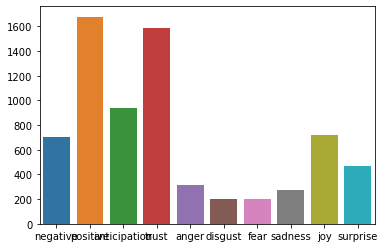

In [26]:
sns.barplot(data = emotion_scores )

In [23]:
emotion_scores[:1]

,negative,positive,anticipation,trust,anger,disgust,fear,sadness,joy,surprise
0,704,1678,937,1588,317,202,204,271,721,471


In [20]:
import seaborn as sns